<h2 align="center">Sampling Distribution <h2>

<h3 align="right"> - Veera Vignesh <br>D19036</h3>

## Table of Contents
- [Introduction](#Introduction)
- [Question 1](#Question-1)
- [Question 2](#Question-2)
- [Question 3](#Question-3)
- [Question 4](#Question-4)
- [Question 5](#Question-5)
- [Question 6](#Question-6)
- [Conclusion](#Conclusion)
- [Question 7](#Question-7)
- [Question 8](#Question-8)

### Introduction:

- Understanding the concept of sampling distribution through Hacker Statistics.
- Understanding the concept of CLT
- Understanding the concept of Bootstrapping

#### Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting SNS style
sns.set_style('darkgrid')

# Loading data set
attrition_full = pd.read_excel('attrition.xlsx')

# Taking only column of interest ---> Monthly Income as a copy
population = attrition_full.MonthlyIncome.copy()

#### Question 1

Plot the Distribution of Monthly Income - Population Distribution of the variable.

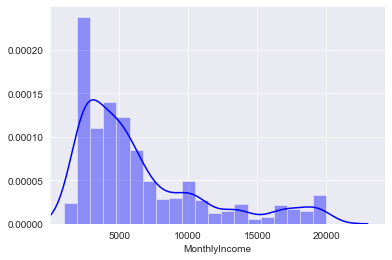

Population Mean: 6502.9313
Population Standard Deviation: 4706.3552


In [2]:
#Plotting population
a=sns.distplot(population, color='b',label="population")
plt.xlim(left=1)
plt.show()
print(f'Population Mean: {np.mean(population):.4f}')
print(f'Population Standard Deviation: {np.std(population):.4f}')

**Observarion:** It is clear from the graph that the population of monthly income follows a *Exponential Distribution*
- The mean value of the population is 6502.93
- The Std of the population is 4706.35

#### Question 2

Draw a Sample of Size 200 plot the Sample Distribution of variable and comment whether it represents the
population distribution.

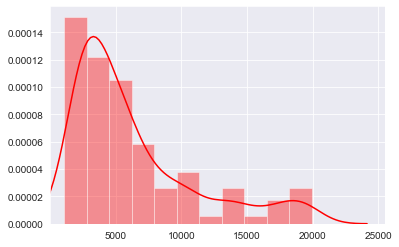

Sample Mean: 6282.9250
Sample Std: 4726.1343


In [40]:
#Selecting Sample from the population
sample = np.random.choice(population,200,replace = False)
# Plotting Sample
b=sns.distplot(sample,color='red',label="Sample")
plt.xlim(left=1)
plt.show()
print(f"Sample Mean: {np.mean(sample):.4f}")
print(f"Sample Std: {np.std(sample):.4f}")

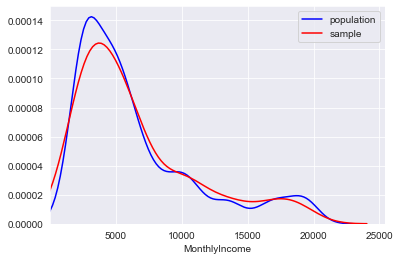

In [29]:
## OVERLAY BOTH POPULATION AND SAMPLE TO SEE THE DIFFERENCE

a=sns.distplot(population,color="b",label="population",hist=False)
b=sns.distplot(sample,color="r",label="sample",hist=False)
plt.xlim(left=1)
plt.show()

**Observations:**  
1. The Sample of size 200 drawn from the population also follows a *Expnential Distribution*
        - The Sample mean is around 6816.44
        - The Sample Std is around 5051.93
2. From the overlay graph we understand that the sample distribution is approximating the population to a greater extent

#### Question 3

Draw a Random sample of size 200 **With Replacement** from the sample collected in Question 2. Plot the Distribution and comment whether it represents the Sample and the Population

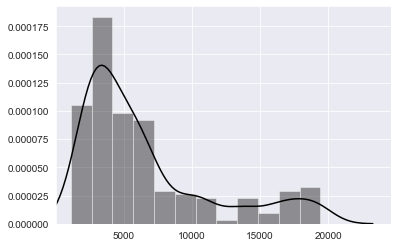

D Mean: 6536.5150
D Std: 4864.7752


In [27]:
#Selecting D from the sample
D = np.random.choice(sample,size=200,replace=True)
#Plotting D obtained from the sample
sns.distplot(D,color='black')
plt.xlim(left=1)
plt.show()
#Printing the Mean and Std of the selection
print(f"D Mean: {np.mean(D):.4f}")
print(f"D Std: {np.std(D):.4f}")

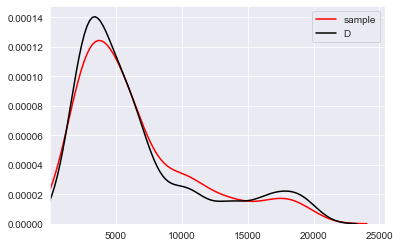

In [36]:
# Overlaying the sample and D obtained from the sample
b = sns.distplot(sample, color="r", label="sample", hist=False)
c = sns.distplot(D, color="k", label="D", hist=False)
plt.xlim(left=1)
plt.show()

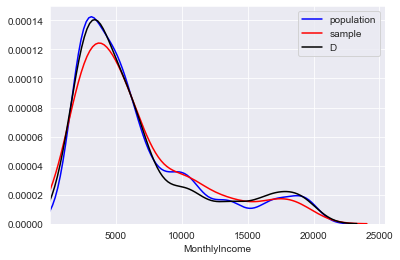

In [37]:
# Plotting All the 3 Population, Sample, D
a = sns.distplot(population, color="b", label="population", hist=False)
b = sns.distplot(sample, color="r", label="sample", hist=False)
c = sns.distplot(D, color="k", label="D", hist=False)
plt.xlim(left=1)
plt.show()

**Observations:**
1. A random sample of size 200 drawn from the sample is denoted as D and its distribution is plotted
        - The Sample mean is around 6536.51
        - The Sample Std is around 4864.77
2. Since D is drawn from the sample we try to understand their spread variation, and from the graph it is clear that D represents Sample
3. Since D represent the sample and since sample is drawn from the population we understand the relationship of the population,sample and D in the 3rd graph. It is clear that both sample and D follows Population to a greater extent

#### Question 4

Repeat the step 3 10 times and note the observation

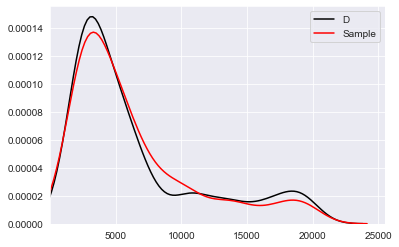

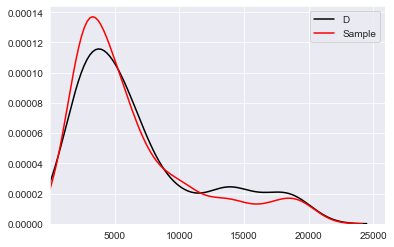

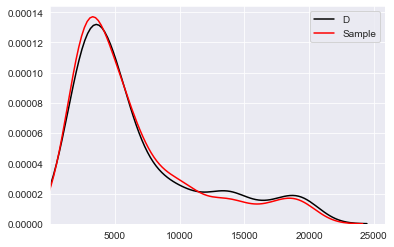

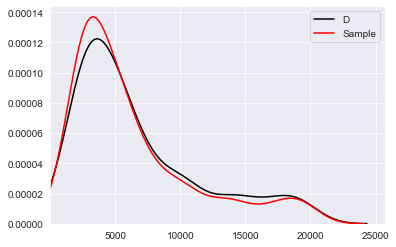

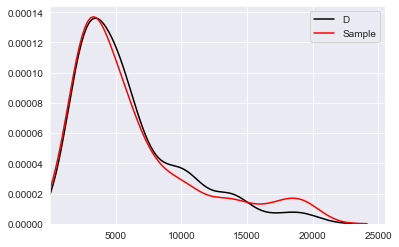

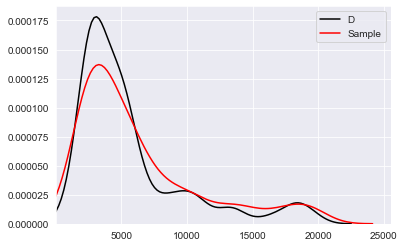

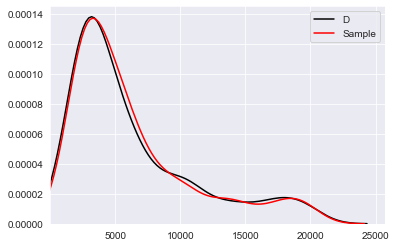

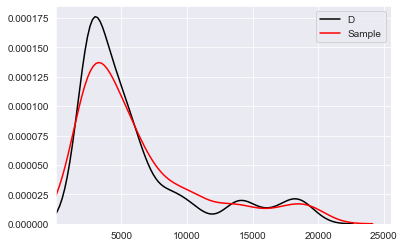

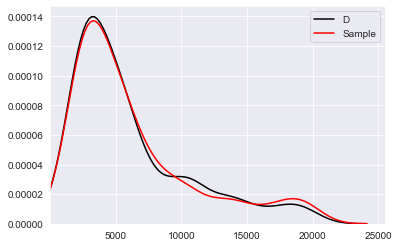

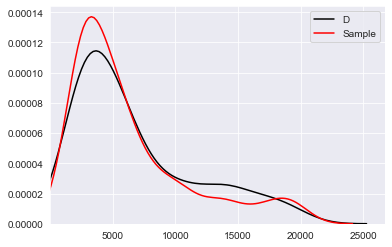

In [57]:
# Running a loop for 10 times to understand whether the D's Variation with respect to Sample
for i in range(10):
    sns.distplot(np.random.choice(sample,size=200,replace=True),color="k",hist=False,label='D')
    sns.distplot(sample,color="r",hist=False,label='Sample')
    plt.xlim(left=1)
    plt.show()

**Observations:**
1. It is clear from the plots that the variation of D holds to a greater extend even if we repeat the experiment for 10 times hence it is clear that it will hold for n trials also

#### Question 5

Check if Central Limit Theorem (CLT) holds using the variable monthly income

S.E 210.1386


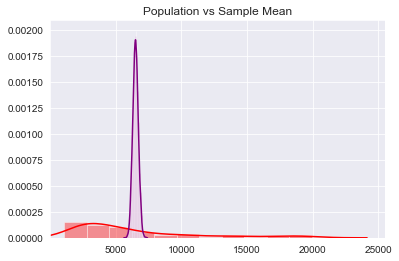

In [66]:
# CLT on the population --> Monthly Income variable
mean_arr = np.zeros(10000)
for i in range(10000):
    CLT_samples = np.random.choice(population,size=500)
    mean_arr[i]= np.mean(CLT_samples)
print(f"S.E {np.std(mean_arr):.4f}")
sns.distplot(sample,hist=True,color="red")
sns.distplot(mean_arr,hist=True,color="purple")
plt.title("Population vs Sample Mean")
plt.xlim(left=1)
plt.show()

In [69]:
#Calculating n/sqrt(500)
print(f'SE from population: {(np.std(population)/(500)**0.5):.4f}')

SE from population: 210.4746


**Observations:**
1. CLT states that irrespective of the distribution of the variable (i.e Exponential Distribution of Monthly Income) The Mean of Means will follow Normal Distribution such that $\frac {n} {\sqrt(samplesize)}$ holds 
2. From the graph it is clear that even though the Variable (Monthly Income) follows an exponential distribution The Mean of the Means follows an Normal Distribution.
3. The standard Error obtained by the distribution is about 210.13
4. The standard Error obtained by the formula is about 210.47

**Hence it is clear that CLT holds**

#### Question 6

Calculate the Bootstrap estimate of the Standard Error of the average monthly income using the sample. Check whether it agrees with the result of CLT

In [75]:
def bootstrap(number):
    boot_mean_arr = np.zeros(10000)
    n=number
    for i in range(10000):
        boot_sample=np.random.choice(sample,size=n,replace=True)
        boot_mean_arr[i]=np.mean(boot_sample)
    boot_SE_mean = np.std(boot_mean_arr)
    print(f"S.E {np.std(boot_mean_arr):.4f}")
    sns.distplot(boot_sample,hist=True,color="red")
    sns.distplot(boot_mean_arr,hist=True,color="purple")
    plt.title("Population vs Sample Mean")
    plt.xlim(left=1)
    plt.show()

S.E 471.3968


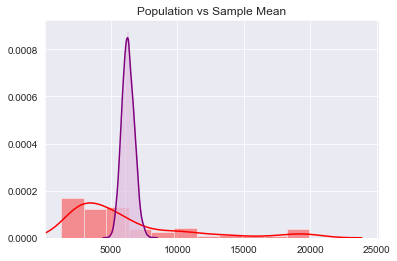

In [76]:
bootstrap(100)

S.E 331.3542


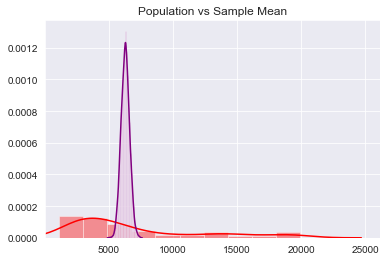

In [77]:
bootstrap(200)

S.E 274.0278


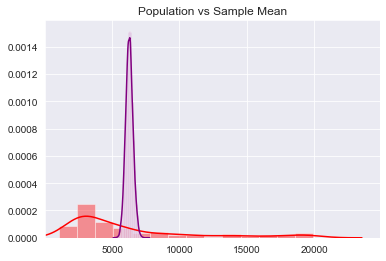

In [78]:
bootstrap(300)

S.E 236.2677


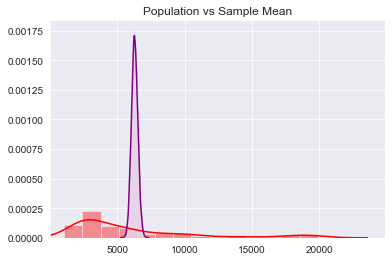

In [79]:
bootstrap(400)

S.E 210.9856


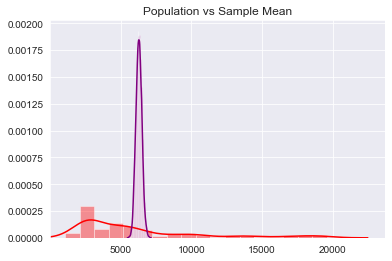

In [80]:
bootstrap(500)

**Observations:**
1. In bootstrapping method as the number of sample size increases it is clear that the standard error is getting reduced
2. For the sample size of 500 it is closer to the S.E obtained from the CLT

### Conclusion
- Verified the CLT using Standard Error calculation obtained by formula is coherent with the one obtained through iteration
- Verified the Standard Error Obtained from the Bootstrap method matches the one that is obtained from the population

<h1 align='Center'> PART B </h1>

#### Question 7

1. Consider the entire variable as population and calculate the population mean $\mu$

In [59]:
#Monthly income varibale is taken as population


#Calculating the mean of the population
print(f'Population Mean: {np.mean(population):.6}')

Population Mean: 6502.93


**Observations** 
- The mean of the population of the variable monthly income is 6502.93

2. Select the sample size of s=200  from the population and calculate a 95% Confidence Interval estimate of the population mean

**Since the value of Confidence interval obtained from the sample is continuous we can check by rounding the CI to 0 with the rounded value of the mean of population**

In [68]:
#Fixing the seed value to maintain reproduceability
np.random.seed(100)
# Selecting a sample of size 200 from the population
sample = np.random.choice(population, size=200)

# Calculating the 95% Confidence Interval
CI_sample = np.percentile(sample, [2.5, 97.5])

#Rounding the CI of the sample in order to find the value of mean is lying within it or not
CI_sample=np.round(CI_sample,0)

#Checking whether the sample mean range was able to capture the Population Mean
np.round(np.mean(population),0) in np.arange(CI_sample[0],CI_sample[1])

True

**Observation:** 
- From the above example it is clear that the value of $\mu$ - Population Mean is lying in between the 95% Confidence Interval of the sample of Size 200

3. Repeat the step 2 1000 times and check how many of those Confidence Intervals captures the true population Mean

In [261]:
# Creating empty arrays to store the value of sample obtained by the random selection process
sample = np.array(np.zeros(200000)).reshape(1000, 200)

# Creating an empty array of type int to store the value of the cofidence interval obtained from the sample
CI = np.array(np.zeros((2000)), dtype=int).reshape(1000, 2)

# Selection of sample for 1000 iteration
for i in range(1000):
    sample[i] = np.random.choice(population, size=200)
    CI[i] = np.percentile(sample[i], [2.5, 97.5])

#Checking whether the value of population mean mu is in the range of the obtained confidence interval
#Calculatin the mean of the population and storing it in a variable 
mu = np.round(np.mean(population),0)
count=[]
for i in range(1000):
    if mu in np.arange(CI[i][0],CI[i][1]):
        count.append(1)
    else:
        count.append(0)

In [264]:
count=np.array(count)
count

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [217]:
count=np.array(count)
len(count==True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


TypeError: object of type 'bool' has no len()

#### Question 8

**Wide vs Narrow**
1. Collect a sample of size 200 from the population and calc a=90% b=99% confidence intervals estimate of the population mean.

In [188]:
#Population Mean
mu=np.mean(population)

#Selecting a sample of size 200
sam = np.random.choice(population,size=200)

CI_90 = np.percentile(sam ,[5,95])
CI_99 = np.percentile(sam,[0.05,99.05])

#Calculating the spread of CI_90 and CI_99
Range_90 = np.max(CI_90)-np.min(CI_90)
Range_99 = np.max(CI_99)-np.min(CI_99)
print(f'The Range of confidence interval with 90% is {Range_90:.7}')
print(f'The Range of confidence interval with 99% is {Range_99:.7}')

The Range of confidence interval with 90% is 17092.3
The Range of confidence interval with 99% is 18592.57


**Observation**
- From the above values it is clear that the spread of the 99% Confidence Interval is higher than 90% Confidence Interval

2.Collect 2 samples from the population of size S1 =200 and S2 of size 400. Using both the samples calculate a 90% CI estimate of $\mu$ which one is narrower?

In [191]:
#Population Mean
mu=np.mean(population)

#Sample 1
sample1= np.random.choice(population,size=200)
sample2= np.random.choice(population,size=400)

#Confidence interval at 90%
CI_sample1 = np.percentile(sample1,[5,95])
CI_sample2 = np.percentile(sample2,[5,95])

#Range of Samples
Range_sample1 = np.max(CI_sample1)-np.min(CI_sample1)
Range_sample2 = np.max(CI_sample2)-np.min(CI_sample2)

print(f'The Range of confidence interval with 90% for sample 1 is  {Range_sample1:.7}')
print(f'The Range of confidence interval with 90% for sample 2 is  {Range_sample2:.7}')

The Range of confidence interval with 90% for sample 1 is  16651.05
The Range of confidence interval with 90% for sample 2 is  15013.5


**Observation**
- From the above above example sample1 with a sample size of 200 has the higher spread when compared to sample2 with size of 400
- It is due to the fact that higher the number of samples the standard error will reduce resulting in reduced spread of the sample distribution